In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


In [3]:
data = pd.read_csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Host descriptors:
* host_id: host ID
* host_name: name of the host
* calculated_host_listings_count: amount of listing per host

Listing descriptors:
* id: listing ID
* name: name of the listing
* room_type: listing space type
* minimum_nights: amount of nights minimum
* availability_365: number of days when listing is available for booking
* price: price in dollars

Review descriptors:
* number_of_reviews: number of reviews
* last_review: latest review
* reviews_per_month: number of reviews per month

Location descriptors:
* neighbourhood_group: location
* neighbourhood: area
* latitude: latitude coordinates
* longitude: longitude coordinates

In [6]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

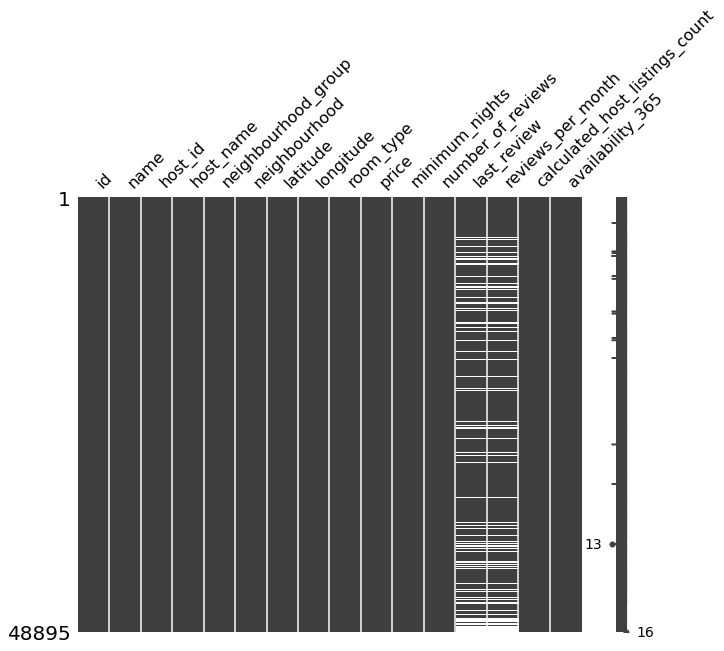

In [7]:
msno.matrix(df=data, figsize=(10, 8))
plt.show()

# EDA - neighbourhood_group

In [8]:
data[["neighbourhood_group", "price"]].groupby(["neighbourhood_group"], as_index = True).count()

,price
neighbourhood_group,
Bronx,1091
Brooklyn,20104
Manhattan,21661
Queens,5666
Staten Island,373


In [9]:
data[["neighbourhood_group", "price"]].groupby(["neighbourhood_group"], as_index = True).mean()

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


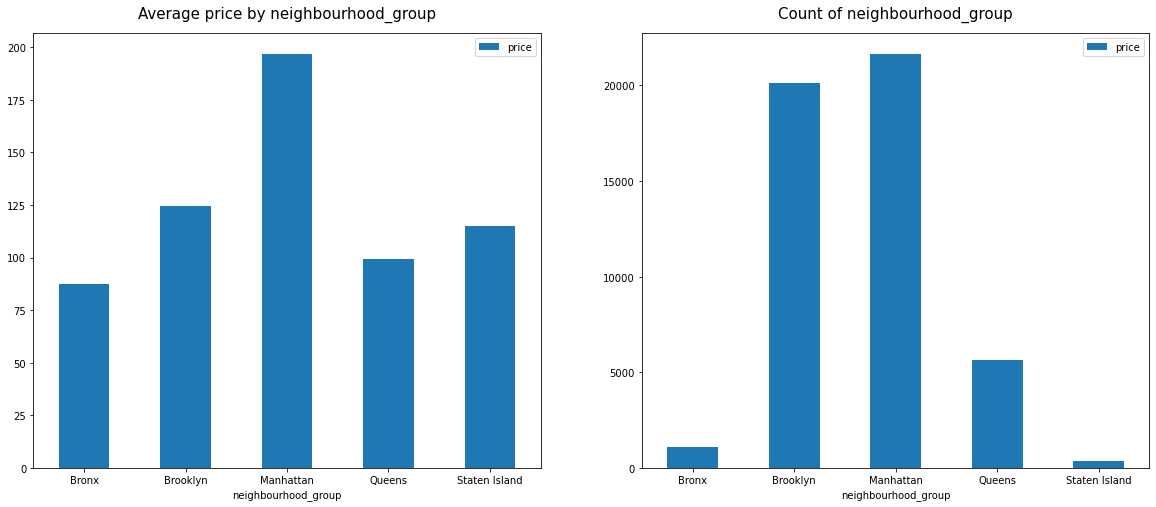

In [10]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
data[["neighbourhood_group", "price"]].groupby(["neighbourhood_group"], as_index = True).mean().plot.bar(rot=0, ax = ax[0])
ax[0].set_title("Average price by neighbourhood_group", fontsize = 15, y = 1.02)
data[["neighbourhood_group", "price"]].groupby(["neighbourhood_group"], as_index = True).count().plot.bar(rot=0, ax = ax[1])
ax[1].set_title("Count of neighbourhood_group", fontsize = 15, y = 1.02)
plt.show()

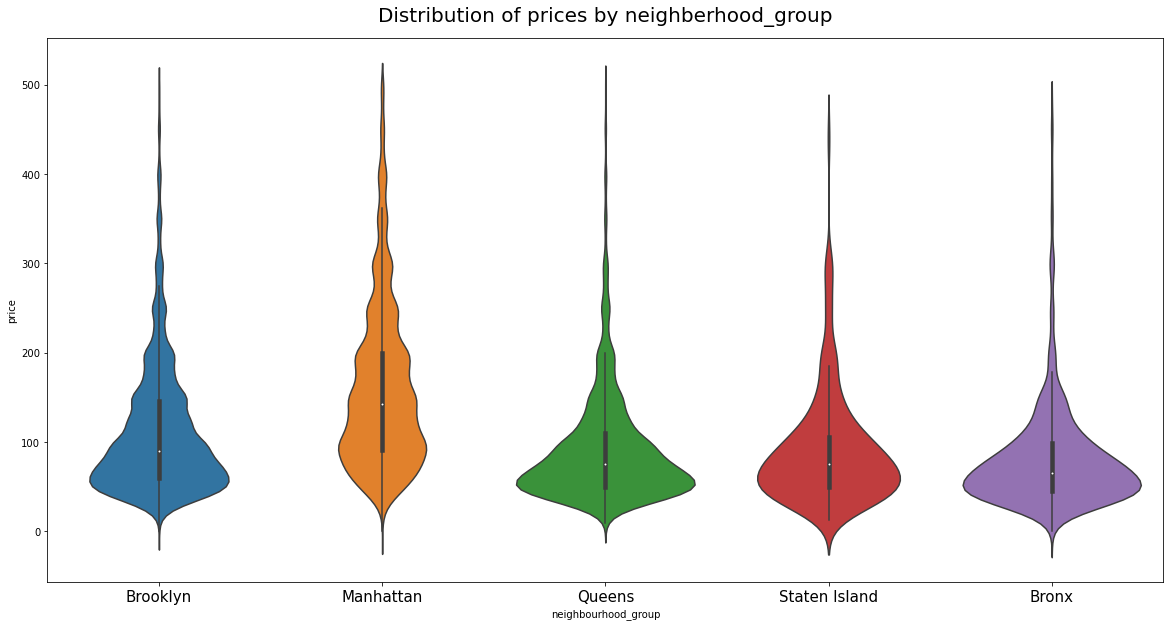

In [11]:
# 가격 500 이상인 이상치 제거
data_p = data[data['price'] < 500]

plt.figure(figsize = (20, 10))
sns.violinplot("neighbourhood_group", "price", scale = "area", data=data_p)
plt.title("Distribution of prices by neighberhood_group", fontsize = 20, y = 1.02)
plt.xticks(fontsize = 15)
plt.show()

# EDA - price, longitude, latitude

In [12]:
print("Maximum price :", data["price"].max())
print("Minimum price :", data["price"].min())
print("Mean price : ", data["price"].mean())

Maximum price : 10000
Minimum price : 0
Mean price :  152.7206871868289


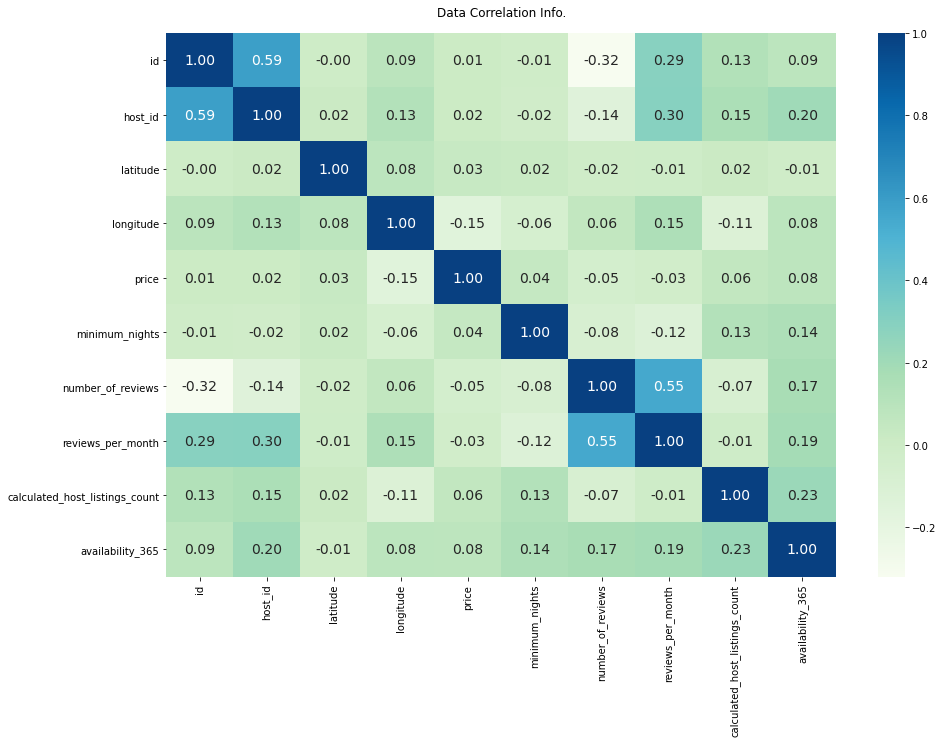

In [13]:
plt.figure(figsize=(15, 10))
plt.title("Data Correlation Info.", y = 1.02)
sns.heatmap(data = data.corr(), annot=True, annot_kws = {'size' : 14}, fmt = '.2f', cmap='GnBu')
plt.show()

In [14]:
print("최대 경도 : ", data["longitude"].max())
print("최소 경도 : ", data["longitude"].mean())
print("평균 경도 : ", data["longitude"].min())
print("경도의 표준편차 : ", data["longitude"].std())

최대 경도 :  -73.71299
최소 경도 :  -73.9521696146839
평균 경도 :  -74.24441999999999
경도의 표준편차 :  0.046156736106371894


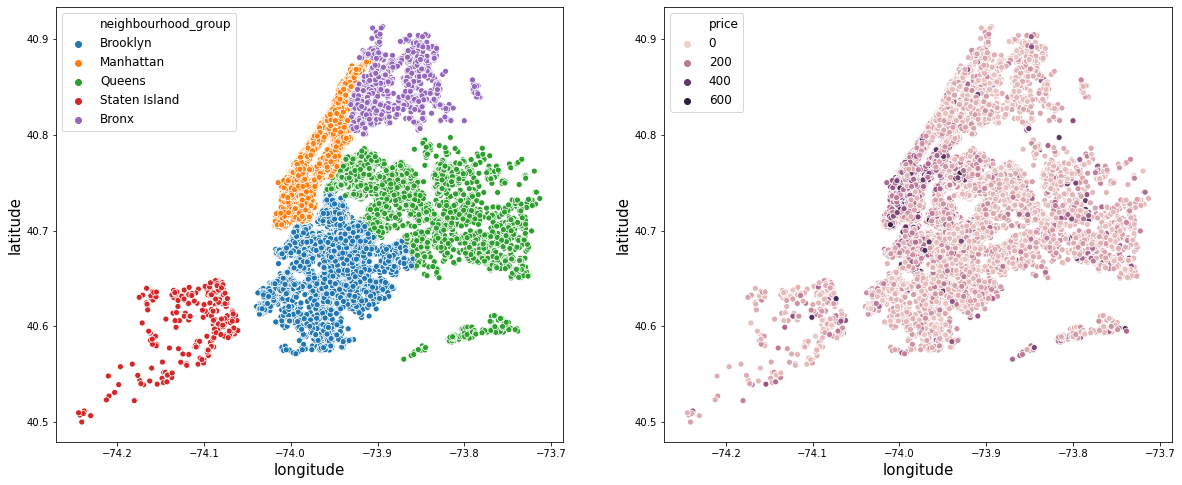

In [15]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.scatterplot(data["longitude"], data["latitude"], hue = data["neighbourhood_group"], ax=ax[0])
ax[0].set_xlabel("longitude", fontsize = 15)
ax[0].set_ylabel("latitude", fontsize = 15)
ax[0].legend(loc = "best", fontsize = 12)

sns.scatterplot(data["longitude"], data["latitude"], hue = data[data["price"] < 500]["price"], ax=ax[1])
ax[1].set_xlabel("longitude", fontsize = 15)
ax[1].set_ylabel("latitude", fontsize = 15)
ax[1].legend(loc = "upper left", fontsize = 12)
plt.show()

# NTLK를 활용하여 name 속성의 단어 빈도수 분석

In [16]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re

## 전체 숙소 분석

In [17]:
data["name"]

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [18]:
to_string = "".join(str(i) for i in data["name"])

In [19]:
# 토큰화하기
tokenized = word_tokenize(to_string)

In [20]:
# 소문자로 변환하기
no_capitals = str(tokenized).lower().split()

In [21]:
# 정규표현식을 이용하여 영문키워드 추출
only_english = re.sub('[^a-zA-Z]', ' ', str(no_capitals)).split()

In [22]:
# 의미가 적은 불용어 제거하기
stop_words = set(stopwords.words('english'))

result = []
for token in only_english: 
    if token not in stop_words: 
        result.append(token) 

In [23]:
# 빈도 수가 가장 높은 상위 20개 추출
words = pd.Series(result)
most_used_words = words.value_counts()[:20]
most_used_words

room         8831
bedroom      7290
private      5362
apartment    4215
br           3853
apt          3780
studio       3134
east         2765
brooklyn     2521
cozy         2502
near         2328
w            2172
spacious     2058
heart        1955
bed          1947
park         1934
manhattan    1846
central      1634
sunny        1634
village      1617
dtype: int64

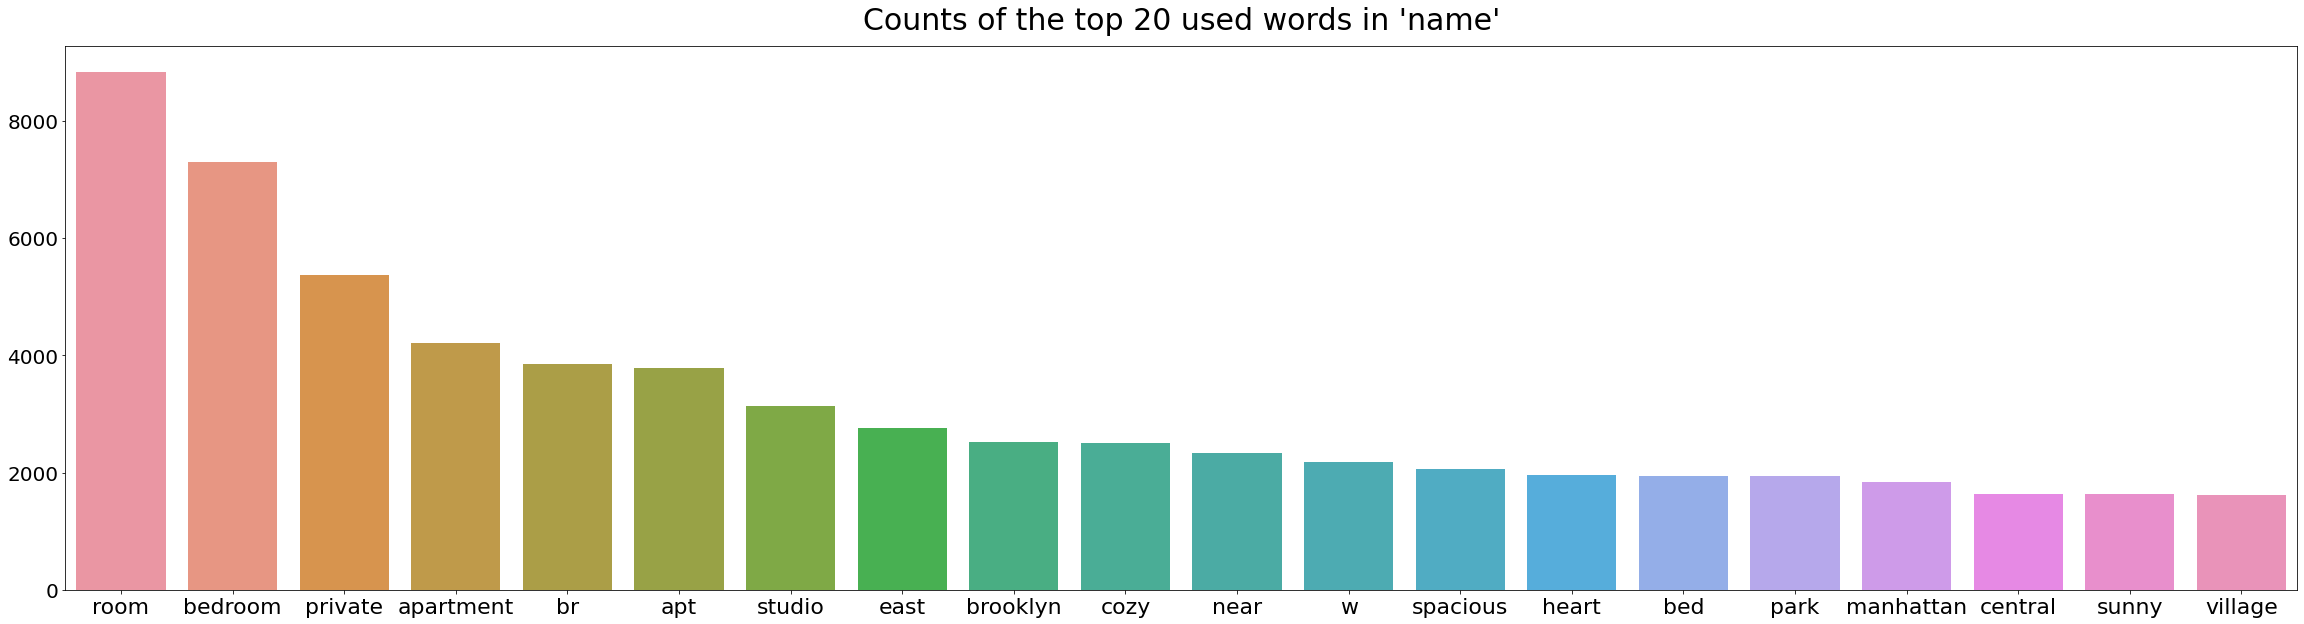

In [24]:
f, ax = plt.subplots(1, 1, figsize=(40, 10))
sns.barplot(most_used_words.index, most_used_words.values, ax = ax)
ax.set_title("Counts of the top 20 used words in 'name'", fontsize = 30, y=1.02)
ax.set_xticklabels(most_used_words.index, fontsize = 22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.show() 

## 가격이 높은 숙소 분석 

In [25]:
high_price = data[data['price'] > 500]
high_price.count()

id                                1044
name                              1044
host_id                           1044
host_name                         1044
neighbourhood_group               1044
neighbourhood                     1044
latitude                          1044
longitude                         1044
room_type                         1044
price                             1044
minimum_nights                    1044
number_of_reviews                 1044
last_review                        622
reviews_per_month                  622
calculated_host_listings_count    1044
availability_365                  1044
dtype: int64

In [26]:
high_price_to_string = "".join(str(i) for i in high_price["name"])

In [27]:
# 토큰화하기
high_price_tokenized = word_tokenize(high_price_to_string)

In [28]:
# 소문자로 변환하기
high_price_no_capitals = str(high_price_tokenized).lower().split()

In [29]:
# 정규표현식을 이용하여 영문키워드 추출
high_price_only_english = re.sub('[^a-zA-Z]', ' ', str(high_price_no_capitals)).split()

In [30]:
# 의미가 적은 불용어 제거하기
stop_words = set(stopwords.words('english'))

high_price_result = []
for token in high_price_only_english: 
    if token not in stop_words: 
        high_price_result.append(token) 

In [31]:
# 빈도 수가 가장 높은 상위 20개 추출
high_price_words = pd.Series(high_price_result)
high_price_most_used_words = high_price_words.value_counts()[:20]
high_price_most_used_words

bedroom      149
br           138
luxury        82
loft          81
suite         71
bed           68
apt           68
bath          67
private       58
townhouse     58
w             54
apartment     53
west          51
village       51
service       50
park          50
midtown       49
fee           49
guest         49
manhattan     49
dtype: int64

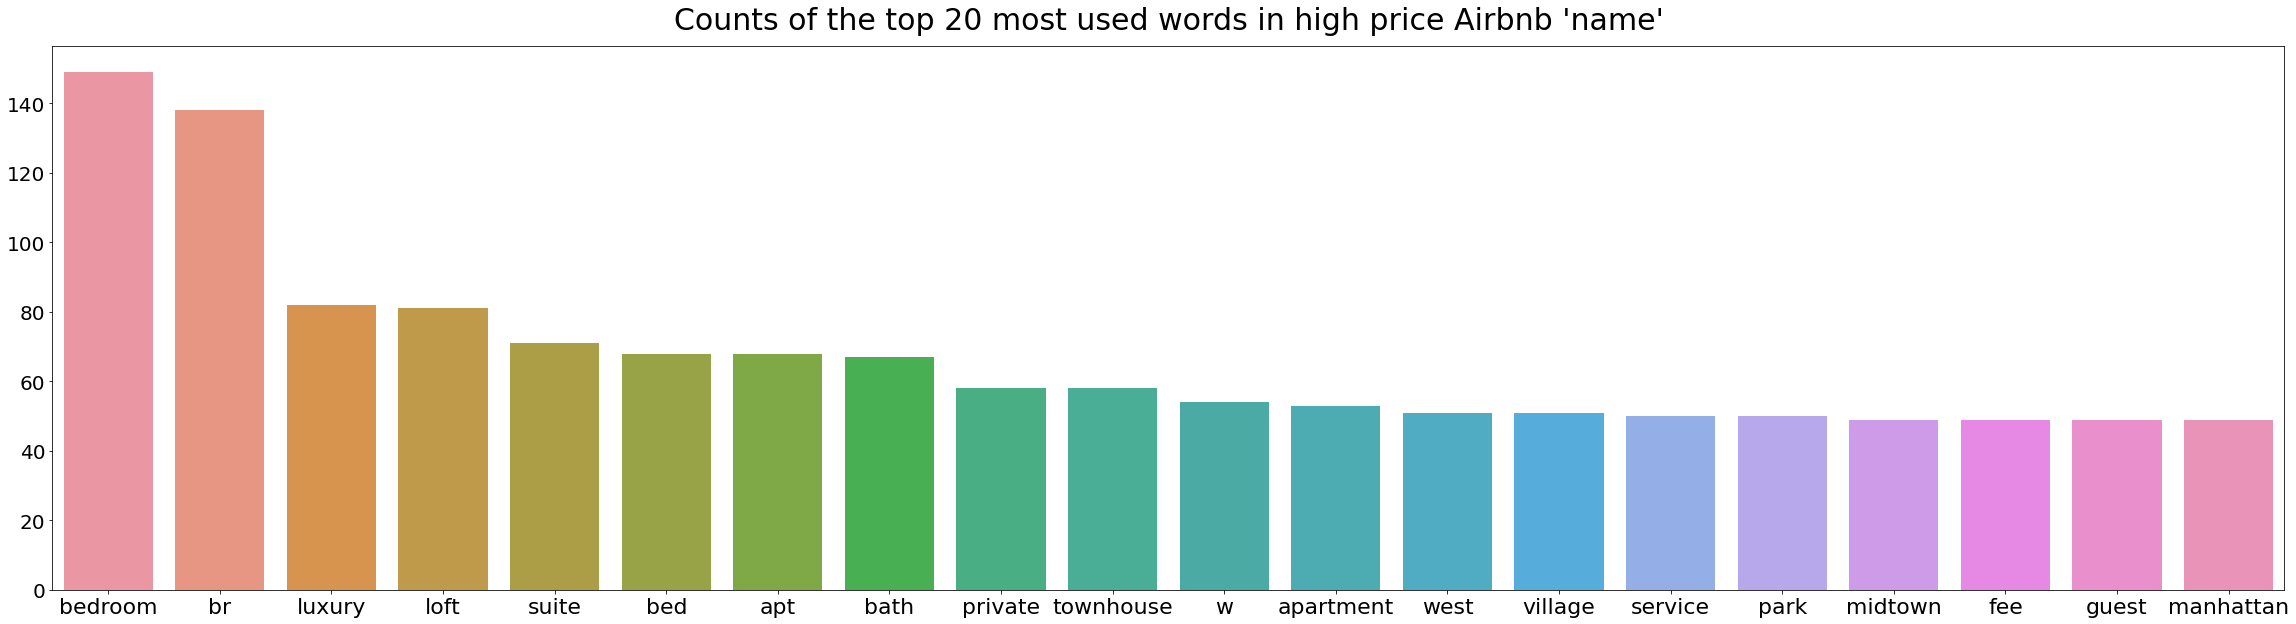

In [32]:
f, ax = plt.subplots(1, 1, figsize=(40, 10))
sns.barplot(high_price_most_used_words.index, high_price_most_used_words.values, ax = ax)
ax.set_title("Counts of the top 20 most used words in high price Airbnb 'name'", fontsize = 30, y=1.02)
ax.set_xticklabels(high_price_most_used_words.index, fontsize = 22)
plt.setp(ax.get_yticklabels(), fontsize=20)
plt.show() 